In [1]:
import json
import networkx as nx # type: ignore
import matplotlib.pyplot as plt # type: ignore

In [2]:
# Load the JSON data
with open(r'C:\Users\Kaya Solis\Downloads\Good_Team.json', 'r') as file:
    data = json.load(file)
    
# Print the data
print(data)

[{'Recipient': 'O', 'Donor': ['AB', 'B', 'A']}, {'Recipient': 'O', 'Donor': ['B']}, {'Recipient': 'A', 'Donor': ['AB']}, {'Recipient': 'O', 'Donor': ['AB', 'A']}, {'Recipient': 'B', 'Donor': ['AB']}, {'Recipient': 'B', 'Donor': ['A']}, {'Recipient': 'O', 'Donor': ['AB', 'B', 'A']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'A', 'Donor': ['AB', 'B']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'O', 'Donor': ['AB', 'B', 'A']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'O', 'Donor': ['A', 'B']}, {'Recipient': 'A', 'Donor': ['AB']}, {'Recipient': 'A', 'Donor': ['AB', 'B']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'O', 'Donor': ['AB', 'B', 'A']}, {'Recipient': 'O', 'Donor': ['AB', 'B', 'A']}, {'Recipient': 'O', 'Donor': ['AB', 'B', 'A']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'B', 'Donor': ['A']}, {'Recipient': 'A', 'Donor': ['AB', 'B']}, {'Recipient': 'A', 'Donor': ['AB', 'B

In [3]:
#import networkx as nx


# Create a graph
G = nx.DiGraph()

# Create nodes
counter = 0
for element in data:
    #print(element)
    G.add_nodes_from([(counter, element)])
    counter += 1

#G.add_nodes_from(data)

#print(G.nodes)

donor_recipient_compatibility = {'O': ['O', 'A', 'B', 'AB'], 'A': ['A', 'AB'], 'B':['B', 'AB'], 'AB':['AB']}

# Create edges (relations)
for node in G.nodes:
    donors = G.nodes[node]['Donor']
    #print(donors)
    for donor in donors:
        for vertex in G.nodes:
            if node == vertex: continue
            recipient = G.nodes[vertex]['Recipient']
            if recipient not in donor_recipient_compatibility[donor]: continue
            G.add_edge(node, vertex)    
                
print('edges:', G.edges) 

edges: [(0, 4), (0, 5), (0, 7), (0, 8), (0, 10), (0, 12), (0, 16), (0, 20), (0, 21), (0, 24), (0, 27), (0, 29), (0, 31), (0, 35), (0, 36), (0, 41), (0, 43), (0, 45), (0, 48), (0, 52), (0, 53), (0, 59), (0, 65), (0, 66), (0, 67), (0, 72), (0, 74), (0, 80), (0, 81), (0, 82), (0, 87), (0, 88), (0, 91), (0, 99), (0, 101), (0, 102), (0, 105), (0, 106), (0, 109), (0, 111), (0, 112), (0, 115), (0, 121), (0, 125), (0, 133), (0, 134), (0, 135), (0, 136), (0, 138), (0, 139), (0, 151), (0, 153), (0, 163), (0, 165), (0, 166), (0, 167), (0, 171), (0, 173), (0, 176), (0, 179), (0, 180), (0, 183), (0, 186), (0, 190), (0, 192), (0, 193), (0, 196), (0, 197), (0, 201), (0, 205), (0, 206), (0, 208), (0, 210), (0, 211), (0, 212), (0, 214), (0, 216), (0, 217), (0, 224), (0, 230), (0, 231), (0, 232), (0, 235), (0, 237), (0, 240), (0, 244), (0, 245), (0, 248), (0, 255), (0, 257), (0, 258), (0, 259), (0, 260), (0, 261), (0, 263), (0, 266), (0, 271), (0, 272), (0, 279), (0, 281), (0, 283), (0, 288), (0, 292), 

In [4]:
# Find cycles of length 2

cycle_2 = []

for (i,j) in G.edges:
    G.edges[(i,j)]["visited"] = False

for (i,j) in G.edges:
    if G.edges[(i,j)]["visited"] == True: continue
    if (j,i) in G.edges:
        cycle_2.append((i,j,i))
        G.edges[(j,i)]["visited"] = True
            
#print("cycles of length 2:", cycle_2)

In [5]:
# Find cycles of length 3

potential_cycle_3 = []

H = G.to_undirected()

for (u,v) in H.edges:
    for k in nx.common_neighbors(H, u, v):
        potential_cycle_3.append((u,v,k))
        
#print("potential_cycle_3:", potential_cycle_3)        
        
cycle_3 = [] 

for (u,v,k) in potential_cycle_3:
    if (u,v) in G.edges and (v,k) in G.edges and (k,u) in G.edges:
        cycle_3.append((u,v,k,u))
    if (v,u) in G.edges and (u,k) in G.edges and (k,v) in G.edges: 
        cycle_3.append((v,u,k,v))

#print("cycle_3:", cycle_3) 

In [6]:
# Find cycles of length 2

cycle_2 = []

for (u,v) in H.edges:
    if (u,v) in G.edges and (v,u) in G.edges:
        cycle_2.append((u,v,u))
            
#print("cycles of length 2:", cycle_2)

In [7]:
# Let's find a maximum matching
import gurobipy as gp # type: ignore
from gurobipy import GRB # type: ignore

# Create model object
m = gp.Model()

# Create variable for each edge
x = m.addVars(G.edges, vtype=GRB.BINARY)

# Objective function: maximize number of edges
m.setObjective(gp.quicksum(x[e] for e in G.edges), GRB.MAXIMIZE)

# The number of incomming arcs to each vertex is at most one
m.addConstrs(gp.quicksum(x[(u,v)] for u in G.neighbors(v) if (u,v) in G.edges) <= 1 for v in G.nodes)

# The number of incomming arcs should be equal to the number of outgoing arcs
m.addConstrs(gp.quicksum(x[(u,v)] for u in G.neighbors(v) if (u,v) in G.edges) == gp.quicksum(x[(v,u)] for u in G.neighbors(v) if (v,u) in G.edges) for v in G.nodes)

# Solve

m.optimize()

Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-13
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22621.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-11800H @ 2.30GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 1464 rows, 188588 columns and 349028 nonzeros
Model fingerprint: 0x456eed2a
Variable types: 0 continuous, 188588 integer (188588 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 662 rows and 107566 columns
Presolve time: 0.44s
Presolved: 802 rows, 81022 columns, 161643 nonzeros
Variable types: 0 continuous, 81022 integer (81022 binary)

Root relaxation: objective 3.820000e+02, 2153 iterations, 0.17 seconds (0.33 work units)

    Nodes    | 

In [8]:
print("Objective:",m.objVal)

selected_edges = [e for e in G.edges if x[e].X > 0.5]

Objective: 382.0


In [9]:
print(selected_edges)

[(5, 49), (7, 306), (8, 331), (9, 468), (10, 377), (12, 278), (16, 130), (20, 687), (21, 583), (22, 698), (23, 420), (24, 410), (27, 174), (28, 190), (31, 198), (35, 628), (36, 219), (37, 518), (40, 59), (41, 385), (42, 217), (43, 103), (44, 516), (48, 453), (49, 390), (51, 81), (53, 641), (59, 668), (60, 610), (63, 12), (64, 443), (65, 682), (66, 476), (67, 551), (69, 717), (71, 708), (80, 236), (81, 731), (83, 704), (86, 702), (87, 626), (88, 108), (90, 111), (91, 177), (93, 41), (96, 618), (98, 224), (99, 338), (101, 169), (102, 60), (103, 211), (106, 466), (108, 532), (111, 597), (112, 578), (113, 701), (114, 536), (115, 730), (120, 427), (121, 439), (124, 87), (125, 141), (128, 165), (130, 693), (131, 633), (132, 24), (133, 457), (135, 566), (136, 155), (138, 154), (139, 69), (141, 263), (143, 683), (145, 10), (146, 680), (148, 726), (149, 654), (150, 186), (152, 651), (154, 696), (155, 398), (157, 5), (158, 648), (161, 571), (163, 131), (165, 659), (166, 406), (167, 595), (169, 6

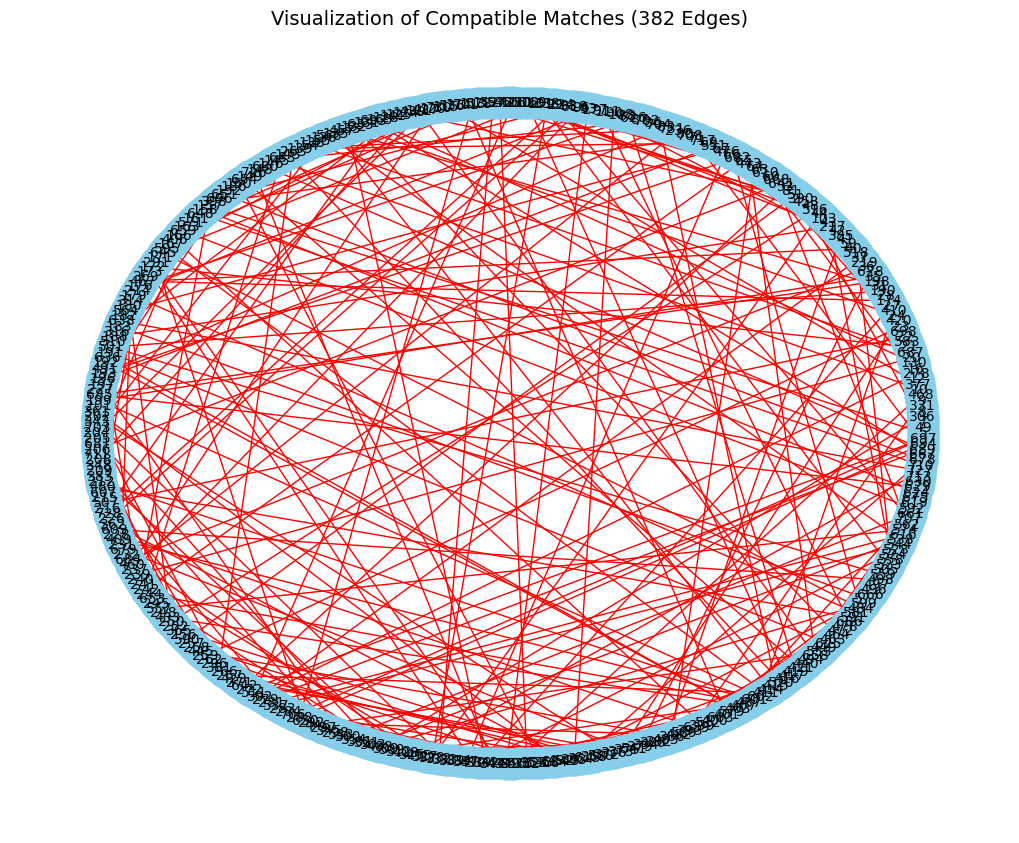

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Extract the edges included in the solution
selected_edges = [e for e in G.edges if x[e].x > 0.5]  # Edges where the decision variable x[e] is 1

# Create a new graph with only the selected edges
matching_graph = nx.Graph()
matching_graph.add_edges_from(selected_edges)

# Generate positions for nodes in a circular layout
pos = nx.circular_layout(matching_graph)

# Draw the graph with selected edges
plt.figure(figsize=(10, 8))  # Set the figure size
nx.draw(
    matching_graph, pos,with_labels=True,edge_color="red",  # Highlight matching edges in red
    node_color="skyblue",  # Use a light blue color for the nodes
    node_size=500,  # Adjust node size for visibility
    font_size=10,  # Adjust font size for node labels
)

# Add a title to the graph
plt.title("Visualization of Compatible Matches (382 Edges)", fontsize=14)
plt.show()
